<a href="https://colab.research.google.com/github/sumaaithal/DeepLearning/blob/main/Google_stock_price_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## preprocessing

In [2]:
train_df = pd.read_csv("/content/Google_Stock_Price_Train.csv")

In [3]:
training_set = train_df.iloc[:,1:2].values

In [4]:
#normalization
sc = MinMaxScaler(feature_range=(0,1))
scaled_training_set = sc.fit_transform(training_set)
scaled_training_set[:3]

array([[0.08581368],
       [0.09701243],
       [0.09433366]])

In [5]:
##creating 60 times steps(60 past steps) and 1 output
X_train = []
y_train = []

for i in range(60,1258):
  X_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [6]:
X_train,y_train

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
         0.08497656],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
         0.08627874],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
         0.08471612],
        ...,
        [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
         0.93796041]]),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]))

In [7]:
## add new dimention
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## building RNN

In [8]:
## note : drop out regularization to avoid overfitting

In [9]:
#initialize the rnn
regressor = Sequential()

In [10]:
## adding our first lstm model
regressor.add( LSTM( units=50, return_sequences= True, input_shape=(X_train.shape[1],1) ) )
regressor.add( Dropout(rate=0.2) )

In [11]:
## add 2nd lstm layer
regressor.add( LSTM( units=50, return_sequences= True) )
regressor.add( Dropout(rate=0.2) )

In [12]:
## add 3rd lstm layer
regressor.add( LSTM( units=50, return_sequences= True) )
regressor.add( Dropout(rate=0.2) )

In [13]:
## add 4th lstm layer
regressor.add( LSTM( units=50, return_sequences= False) )
regressor.add( Dropout(rate=0.2) )

In [14]:
## add output layer
regressor.add( Dense(units=1) )

In [15]:
## compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
## fit the training data to a model
regressor.fit(X_train,y_train, epochs=100, batch_size=32 )

Epoch 1/100
38/38 [==============================] - 17s 162ms/step - loss: 0.0282
Epoch 2/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 6s 143ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0044
Epoch 13/100

In [18]:
## get the actual stock price of 2017
test_df = pd.read_csv("/content/Google_Stock_Price_Test.csv")
test_set = test_df.iloc[:,1:2].values

In [28]:
## get the predicted stock price of 2017
dataset_total = pd.concat((train_df['Open'], test_df['Open']) , axis=0)

In [29]:
inputs = dataset_total[len(dataset_total) - len(test_df) - 60 : ].values

In [31]:
inputs = inputs.reshape(-1,1)

In [32]:
inputs = sc.transform(inputs)

In [33]:
##creating 60 times steps(60 past steps) and 1 output
X_test = []

for i in range(60,80):
  X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

In [34]:
## add new dimention
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [35]:
y_pred = regressor.predict(X_test) #scaled values

1/1 [==============================] - 2s 2s/step


In [37]:
## get the original value using inverse transform method
y_pred = sc.inverse_transform(y_pred)

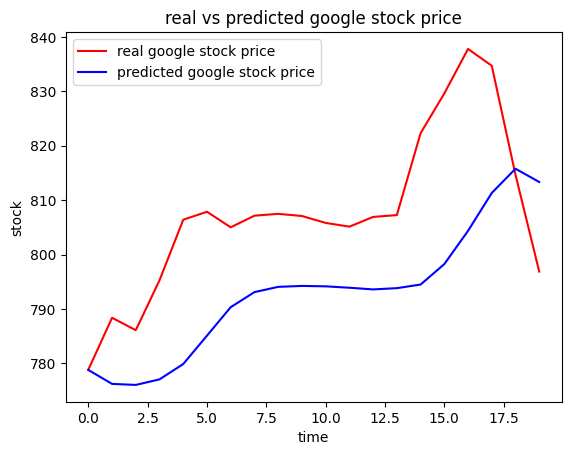

In [39]:
#visualizing the final prediction
plt.plot(test_set, color='red',label='real google stock price')
plt.plot(y_pred, color='blue',label='predicted google stock price')
plt.title("real vs predicted google stock price")

plt.xlabel("time")
plt.ylabel("stock")
plt.legend()
plt.show()